In [1]:
import torch
import gym
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import random
from IPython.display import clear_output
from multiprocessing.pool import ThreadPool

In [207]:
class Game():
    import numpy as np
    import random
    def __init__(self,playfirst = True,human_play = False):
        self.playfirst = playfirst
        self.human_play = human_play
        if self.playfirst:
            self.player_just_played = -1
        else:
            self.player_just_played = 1
        self.all_actions = dict(enumerate([(i,j) for i in range(9) for j in range(6)]))
        self.all_actions_rev = {j:i for i,j in self.all_actions.items()}
        self.game_size = (9,6)
        self.board = self.np.zeros((9,6))
        self.state_space =(379,)
        self.action_space = 54
        
    def make_game(self,print_gameboard=False):
        self.board = self.np.zeros((9,6))
        if self.playfirst:
            self.player_just_played = -1
            if print_gameboard:
                self.print_game()
            return self.board,self.get_available_moves()
        else:
            self.player_just_played = 1
            available_moves = self.get_available_moves()
            
#             if self.human_play:
#                 row = int(input("Enter row: "))
#                 col = int(input("enter column: "))
#                 action = [i for i,j in self.all_actions.items() if j == (row,col)][0]
#             else:
            action = self.random.choice(available_moves)
            self.board = self.np.zeros((9,6))
            self.play(action)
            self.change_player()
            if print_gameboard | self.human_play:
                self.print_game()
            return self.board,self.get_available_moves()
       
            
    def chain(self):
        while abs(self.board).max() > 1:
            check_board = self.board.copy()
            for i in range(0,9):
                for j in range(0,6):
                    if abs(self.board[i][j]) > 1:
                        if ((i==0)&(j==0))|((i==0)&(j==5)) | ((i==8)&(j==0)) | ((i==8)&(j==5)):
                            if self.board[i][j] > 0:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1
                                if row_B in range(0,9):
                                    self.board[row_B][j] = int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1
                                if col_L in range(0,6):
                                    self.board[i][col_L] = int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1
                                if col_R in range(0,6):
                                    self.board[i][col_R] = int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1
                            else:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = -(int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1)
                                if row_B in range(0,9):
                                    self.board[row_B][j] = -(int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1)
                                if col_L in range(0,6):
                                    self.board[i][col_L] = -(int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1)
                                if col_R in range(0,6):
                                    self.board[i][col_R] = -(int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1)
                    if abs(self.board[i][j]) > 2:
                        if ((i in range(1,8))&(j==0))| ((i in range(1,8))&(j==5)) | ((i==0)&(j in range(1,5))) | ((i==8)&(j in range(1,5))):
                            if self.board[i][j] > 0:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1
                                if row_B in range(0,9):
                                    self.board[row_B][j] = int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1
                                if col_L in range(0,6):
                                    self.board[i][col_L] = int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1
                                if col_R in range(0,6):
                                    self.board[i][col_R] = int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1
                            else:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = -(int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1)
                                if row_B in range(0,9):
                                    self.board[row_B][j] = -(int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1)
                                if col_L in range(0,6):
                                    self.board[i][col_L] = -(int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1)
                                if col_R in range(0,6):
                                    self.board[i][col_R] = -(int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1)


                    if abs(self.board[i][j]) > 3:
                        if ((i in range(1,8))&(j in range(1,5))):
                            if self.board[i][j] > 0:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1
                                if row_B in range(0,9):
                                    self.board[row_B][j] = int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1
                                if col_L in range(0,6):
                                    self.board[i][col_L] = int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1
                                if col_R in range(0,6):
                                    self.board[i][col_R] = int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1
                            else:
                                row_A = i-1
                                row_B = i+1
                                col_L = j-1
                                col_R = j+1
                                self.board[i][j] = 0
                                if row_A in range(0,9):
                                    self.board[row_A][j] = -(int(self.np.sqrt(self.np.square(self.board[row_A][j]))) + 1)
                                if row_B in range(0,9):
                                    self.board[row_B][j] = -(int(self.np.sqrt(self.np.square(self.board[row_B][j]))) + 1)
                                if col_L in range(0,6):
                                    self.board[i][col_L] = -(int(self.np.sqrt(self.np.square(self.board[i][col_L]))) + 1)
                                if col_R in range(0,6):
                                    self.board[i][col_R] = -(int(self.np.sqrt(self.np.square(self.board[i][col_R]))) + 1)


            if self.board.max()<=0:
                break
            elif self.board.min() >=0:
                break

            if (self.board == check_board).min() == True:
                break

    def play(self,action):
        row,col = self.all_actions[action]
        if self.player_just_played == 1:
            self.board[row][col] -= 1
            self.chain()
        else:
            self.board[row][col] += 1
            self.chain() 
        
                
    
    def check_win_tie(self):
        if len(self.board.nonzero()[0]) > 2:
            if self.board.max() != self.board.min():
                if self.board.max()<=0:
                    return -1
                elif self.board.min()>=0:
                    return 1
    
    def get_available_moves(self):
            temp_moves = []
            for i in range(0,9):
                for j in range(0,6):
                    if self.board[i][j]*self.player_just_played <= 0:
                        temp_moves.append(self.all_actions_rev[(i,j)])
            return temp_moves

    
    def print_game(self):
        print(self.board)
#         for i in range(self.game_size):
#             if i < 2:
#                 print('  ',self.symbol_match[self.board[i,0]], ' | ',self.symbol_match[self.board[i,1]],' | ',self.symbol_match[self.board[i,2]])
#                 print('-------------------')
#             else:
#                 print('  ',self.symbol_match[self.board[i,0]], ' | ',self.symbol_match[self.board[i,1]],' | ',self.symbol_match[self.board[i,2]])
                
                
    def convert_board(self):
        if self.player_just_played == 1:
            flag = 1
        elif self.player_just_played == -1:
            flag = 0
        g = self.board.reshape(54)
        base = self.np.zeros_like(g)
        first_1 = base.copy()
        first_2 = base.copy()
        first_3 = base.copy()
        second_1 = base.copy()
        second_2 = base.copy()
        second_3 = base.copy()
        zeros = base.copy()
        first_1[self.np.where(g==1)] = 1
        first_2[self.np.where(g==2)] = 1
        first_3[self.np.where(g==3)] = 1
        zeros[self.np.where(g==0)] = 1
        second_1[self.np.where(g==-1)] = 1
        second_2[self.np.where(g==-2)] = 1
        second_3[self.np.where(g==-3)] = 1
        return self.np.append(self.np.concatenate((first_1,first_2,first_3,second_1,second_2,second_3,zeros)),flag)
    
    def change_player(self):
        if self.player_just_played == 1:
            self.player_just_played = -1
        else:
            self.player_just_played = 1
    
    def step(self,action,print_gameboard=False):
        available_moves = self.get_available_moves()
        if action in available_moves:
            self.play(action)
            if print_gameboard | self.human_play:
                self.print_game()
        self.change_player()
        game_result = self.check_win_tie()
        if game_result == None:
            done = False
            reward = 0
        else:
            done = True
            if game_result == 1:
                reward = 1
            elif game_result ==-1:
                reward = -1
            state = self.convert_board()
            return self.board,reward,done,self.get_available_moves()
        
        
        available_moves = self.get_available_moves()
        if len(available_moves) > 0:
#             if self.human_play:
#                 row = int(input("Enter row: "))
#                 col = int(input("enter column: "))
#                 action = [i for i,j in self.all_actions.items() if j == (row,col)][0]
#             else:
            action = self.random.choice(available_moves)
            self.play(action)
            if print_gameboard | self.human_play:
                print("env played",self.all_actions[action])
                self.print_game()
            self.change_player()

        game_result = self.check_win_tie()
        if game_result == None:
            done = False
            reward = 0
        else:
            done = True
            if game_result == 1:
                reward = 1
            elif game_result ==-1:
                reward = -1
            state = self.convert_board()
            state = self.convert_board()
            return self.board,reward,done,self.get_available_moves()
        state = self.convert_board()
        return self.board,reward,done,self.get_available_moves()
        

In [208]:
env = Game()

In [209]:
obj,available_moves = env.make_game()

In [210]:
obj

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [211]:
ln = []
for i in range(1):
    env = Game()
    done = False
    data = []
    while not done:
        print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        action = random.choice(env.get_available_moves())
        print("random played",env.all_actions[action])
        state,reward,done,available_moves = env.step(action,print_gameboard=True)
        data.append((state,reward,done,available_moves))
    ln.append(len(data))

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (6, 2)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
env played (7, 1)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (8, 5)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]]
env played (5, 4)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (4, 3)
[[ 0.  0. -1.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  1.  0.]
 [ 0. -1.  1.  1. -1. -1.]
 [-1.  0.  0.  2.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.]
 [-1.  0.  1.  0.  2.  0.]
 [ 0. -2.  0.  0. -1. -2.]
 [ 1. -1.  0.  0.  0.  1.]]
env played (7, 4)
[[ 0.  0. -1.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  1.  0.]
 [ 0. -1.  1.  1. -1. -1.]
 [-1.  0.  0.  2.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.]
 [-1.  0.  1.  0.  2.  0.]
 [ 0. -2.  0.  0. -2. -2.]
 [ 1. -1.  0.  0.  0.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (5, 2)
[[ 0.  0. -1.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  1.  0.]
 [ 0. -1.  1.  1. -1. -1.]
 [-1.  0.  0.  2.  0.  0.]
 [ 0. -1.  1.  0. -1.  0.]
 [-1.  0.  1.  0.  2.  0.]
 [ 0. -2.  0.  0. -2. -2.]
 [ 1. -1.  0.  0.  0.  1.]]
env played (6, 0)
[[ 0.  0. -1.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  1

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (3, 0)
[[ 0.  1. -1.  2.  0.  1.]
 [-1. -2.  0.  0.  1.  1.]
 [ 2.  2.  1. -2.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [-1.  0. -1.  2.  0.  1.]
 [-2. -1.  1. -2. -1.  1.]
 [-2.  0.  1.  0.  2.  0.]
 [ 1. -3.  0.  1. -2. -2.]
 [ 0.  2. -1.  1.  0.  1.]]
env played (6, 3)
[[ 0.  1. -1.  2.  0.  1.]
 [-1. -2.  0.  0.  1.  1.]
 [ 2.  2.  1. -2.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [-1.  0. -1.  2.  0.  1.]
 [-2. -1.  1. -2. -1.  1.]
 [-2.  0.  1. -1.  2.  0.]
 [ 1. -3.  0.  1. -2. -2.]
 [ 0.  2. -1.  1.  0.  1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (7, 2)
[[ 0.  1. -1.  2.  0.  1.]
 [-1. -2.  0.  0.  1.  1.]
 [ 2.  2.  1. -2.  1.  1.]
 [ 1. -1.  1.  1. -1. -1.]
 [-1.  0. -1.  2.  0.  1.]
 [-2. -1.  1. -2. -1.  1.]
 [-2.  0.  1. -1.  2.  0.]
 [ 1. -3.  1.  1. -2. -2.]
 [ 0.  2. -1.  1.  0.  1.]]
env played (1, 0)
[[ 0.  1. -1.  2.  0.  1.]
 [-2. -2.  0.  0.  1.  1.]
 [ 2.  2.  1. -2.  1

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (7, 2)
[[-1.  1. -1.  2.  1.  0.]
 [-2. -2.  2.  0.  1.  2.]
 [ 2.  3.  0.  3.  1.  2.]
 [ 1. -1.  2.  1. -1.  2.]
 [-1.  0. -3.  2. -2. -2.]
 [-2. -3.  1. -3.  0. -1.]
 [-2.  0.  1. -2. -1. -2.]
 [ 2. -3.  3. -2. -3. -1.]
 [ 1.  2. -2. -2. -1. -1.]]
env played (0, 0)
[[-1. -1. -2.  2.  1.  0.]
 [ 0. -2. -3.  0.  1.  2.]
 [-2. -1. -1.  3.  1.  2.]
 [-2. -2.  2.  1. -1.  2.]
 [-1.  0. -3.  2. -2. -2.]
 [-2. -3.  1. -3.  0. -1.]
 [-2.  0.  1. -2. -1. -2.]
 [ 2. -3.  3. -2. -3. -1.]
 [ 1.  2. -2. -2. -1. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
random played (8, 0)
[[-1. -1. -2.  2.  1.  0.]
 [ 0. -2. -3.  0.  1.  2.]
 [-2. -1. -1.  3.  1.  2.]
 [-2. -2.  2.  1. -1.  2.]
 [ 2.  1. -3.  2. -2. -2.]
 [ 1.  0.  2. -3.  0.  2.]
 [ 2.  3.  2.  3.  3.  0.]
 [ 1.  3.  2.  2.  2.  1.]
 [ 0.  2.  1.  0.  2.  1.]]
env played (1, 1)
[[-1. -1. -2.  2.  1.  0.]
 [ 0. -3. -3.  0.  1.  2.]
 [-2. -1. -1.  3.  1

In [212]:
reward

-1

In [213]:
state.shape

(9, 6)

In [214]:
class ActorNet(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(ActorNet,self).__init__()
        self.cn1 = nn.Conv2d(in_channels=1,out_channels=128,kernel_size=2,stride=1,padding=0)
        self.tanh1 = nn.ReLU()
#         self.mx1 = nn.MaxPool2d(2)
        self.cn2 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=2,stride=1,padding=0)
        self.tanh2 = nn.ReLU()
#         self.mx2 = nn.MaxPool2d(2)
        self.cn3 = nn.Conv2d(in_channels=64,out_channels=16,kernel_size=2,stride=1,padding=0)
        self.tanh3 = nn.ReLU()
#         self.mx3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(6 * 3 * 16,output_dim)
        
    def forward(self,obj,action=False,max_act=False):
        x = torch.FloatTensor(obj).view(-1,1,9,6)
        x = self.tanh1(self.cn1(x))
        x = self.tanh2(self.cn2(x))
        x = self.tanh3(self.cn3(x))
        x = x.view(-1,6 * 3 * 16)
        logits = self.fc1(x)
        m = Categorical(logits=logits)
        act = m.sample()
        log_p = m.log_prob(act)
        if action:
            return m.log_prob(torch.LongTensor(action))
        else:
            if max_act:
                return torch.argmax(logits).item()
            else:
                return m,act.item(),log_p

In [215]:
input_dim = env.state_space[0]

In [216]:
input_dim

379

In [217]:
output_dim = env.action_space

In [218]:
output_dim

54

In [219]:
act_net = ActorNet(1,output_dim)

In [220]:
env.board

array([[-1., -2., -1., -1., -2., -1.],
       [-3., -3., -4., -3., -1., -2.],
       [-1., -1., -1., -1., -2., -2.],
       [-2., -1., -4.,  0., -2., -2.],
       [-2., -2.,  0., -2., -2., -2.],
       [-3., -3., -2., -3., -2., -2.],
       [ 0., -2., -2., -2., -2., -2.],
       [-2., -2., -3.,  0., -3.,  0.],
       [-1.,  0., -1., -2., -2., -1.]])

In [221]:
act_net.forward(env.board)

(Categorical(probs: torch.Size([1, 54]), logits: torch.Size([1, 54])),
 53,
 tensor([-3.9537], grad_fn=<SqueezeBackward1>))

In [222]:
x = torch.FloatTensor(env.board).view(-1,1,9,6)
x = act_net.tanh1(act_net.cn1(x))
print(x.shape)
x = act_net.tanh2(act_net.cn2(x))
print(x.shape)
x = act_net.tanh3(act_net.cn3(x))
print(x.shape)

torch.Size([1, 128, 8, 5])
torch.Size([1, 64, 7, 4])
torch.Size([1, 16, 6, 3])


In [223]:
x.shape

torch.Size([1, 16, 6, 3])

In [224]:
x[0][0]

tensor([[0.1072, 0.0225, 0.0000],
        [0.0340, 0.1749, 0.0402],
        [0.2336, 0.0000, 0.1116],
        [0.0728, 0.1001, 0.1284],
        [0.0000, 0.1710, 0.0000],
        [0.0829, 0.2493, 0.0000]], grad_fn=<SelectBackward>)

In [225]:
18*16

288

In [226]:
class CriticNet(nn.Module):
    def __init__(self,input_dim):
        super(CriticNet,self).__init__()
        self.cn1 = nn.Conv2d(in_channels=1,out_channels=128,kernel_size=2,stride=1,padding=0)
        self.tanh1 = nn.ReLU()
        self.cn2 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=2,stride=1,padding=0)
        self.tanh2 = nn.ReLU()
        self.cn3 = nn.Conv2d(in_channels=64,out_channels=16,kernel_size=2,stride=1,padding=0)
        self.tanh3 = nn.ReLU()
        self.fc1 = nn.Linear(6 * 3 * 16,1)
        
    def forward(self,obj):
        x = torch.FloatTensor(obj).view(-1,1,9,6)
        x = self.tanh1(self.cn1(x))
        x = self.tanh2(self.cn2(x))
        x = self.tanh3(self.cn3(x))
        x = x.view(-1,6 * 3 * 16)
        v = self.fc1(x)
        return v

In [227]:
crit_net = CriticNet(input_dim)

In [228]:
crit_net.forward(env.board)

tensor([[0.0275]], grad_fn=<AddmmBackward>)

In [229]:
gamma = 0.99
lamda = 0.95
clip_ratio = 0.2
lr_pi = 1e-4
lr_v = 1e-3
target_kl = 0.01
train_pi_iter = 10
train_v_iter = 10
traj_n = 10
iters = 1000

In [230]:
optim_actor = optim.Adam(params=act_net.parameters(),lr=lr_pi)
optim_critic = optim.Adam(params=crit_net.parameters(),lr=lr_v)

In [231]:
def disc_cuml_rew_calc(rews,gamma=gamma):
    return list(scipy.signal.lfilter([1], [1, float(-gamma)], rews[::-1], axis=0)[::-1])

In [232]:
obj.shape

(9, 6)

In [233]:
def traject(t):
    traj = []
    rews = []
    env = Game()
    obj,available_moves = env.make_game()
    done = False
    while not done:
        v = crit_net.forward(obj)
        m,act,log_p = act_net.forward(obj)
        next_obj,reward,done,_ = env.step(act,print_gameboard=False)
        traj.append([act,obj,next_obj,reward,done,log_p,v])
        rews.append(reward)
        obj = next_obj
    rews_disc_cuml_scaled = disc_cuml_rew_calc(rews)
    act,obj,_,rews,_,old_policy,v = zip(*traj)
    adv = [rews[i] + gamma*v[i+1] - v[i] for i in range(len(rews)-1)] + [0 - v[-1]]
    adv = torch.FloatTensor(adv)
    adv = disc_cuml_rew_calc(adv.numpy(),gamma*lamda)
    adv = torch.FloatTensor(adv)
    adv = (adv - adv.mean())/adv.std()
    traj = [i + [j,k] for i,j,k in zip(traj,rews_disc_cuml_scaled,adv)]
    return traj,sum(rews)

0


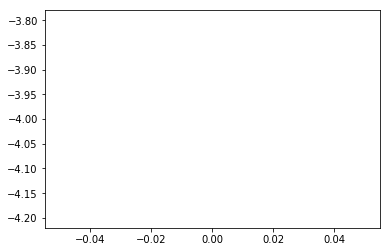

1
2
3
4


In [ ]:
rewards = []
for k in range(iters):
    print(k)
    process = ThreadPool(processes=1)
    out = process.map(traject,range(10))
    process.close()
    process.join()
    trajectories,rewards_t = list(zip(*out))
    rewards.append(sum(rewards_t))
    trajectories = reduce(lambda a,b: a+b,trajectories)
    act,obj,_,rews,_,old_policy,v,rews_disc_cuml,adv = zip(*trajectories)
    adv = torch.FloatTensor(adv)
    old_policy = torch.FloatTensor(old_policy)

    for t in range(train_pi_iter):
        new_policy = act_net.forward(obj,action=act)
        ratio = torch.exp(new_policy-old_policy)
        clip_adv = torch.clamp(ratio, 1-clip_ratio, 1+clip_ratio) * adv
        loss_pi = -(torch.min(ratio * adv, clip_adv)).mean()
        optim_actor.zero_grad()
        loss_pi.backward()
        optim_actor.step()
        if (new_policy - old_policy).mean().item() > 1.5 * target_kl:
            print('early_stopping')
            break

    for t in range(train_v_iter):
        loss_v = ((crit_net.forward(obj) - torch.FloatTensor(rews_disc_cuml)) ** 2).mean()
        optim_critic.zero_grad()
        loss_v.backward()
        optim_critic.step()
        
        
    if k % 10 == 0:
        clear_output(wait=True)
        print(k)
        episode_returns = rewards
        plt.plot(episode_returns)
        plt.show()

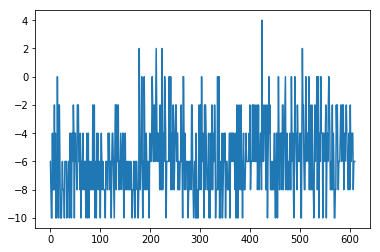

In [23]:
plt.plot(episode_returns)

In [24]:
len(trajectories)

609

In [25]:
import time

(2, 3)

In [64]:
env = Game()
obj,available_moves = env.make_game()
done = False
while not done:
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    act = k.forward(obj,max_act=True)
    print("Net played",env.all_actions[act])
    next_obj,reward,done,_ = env.step(act,print_gameboard=True)
    obj = next_obj
print(reward)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Net played (4, 1)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
env played (3, 3)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Net played (4, 1)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
env played (7, 4)
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  2.  0.  0

 [ 0. -1.  0.  0. -1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Net played (4, 1)
[[ 0.  0.  0.  0. -2. -1.]
 [ 2.  1.  0. -2.  0. -1.]
 [ 1.  1.  2. -1. -3.  0.]
 [ 1.  3.  2.  3. -1.  0.]
 [ 0.  2.  0.  3. -2.  0.]
 [ 2.  3.  3.  1.  0.  0.]
 [ 1.  0.  2. -2.  0. -1.]
 [ 2.  3.  0.  0. -1.  0.]
 [ 0. -1.  0.  0. -1.  0.]]
env played (4, 4)
[[ 0.  0.  0.  0. -2. -1.]
 [ 2.  1.  0. -2.  0. -1.]
 [ 1.  1.  2. -1. -3.  0.]
 [ 1.  3.  2.  3. -1.  0.]
 [ 0.  2.  0.  3. -3.  0.]
 [ 2.  3.  3.  1.  0.  0.]
 [ 1.  0.  2. -2.  0. -1.]
 [ 2.  3.  0.  0. -1.  0.]
 [ 0. -1.  0.  0. -1.  0.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Net played (4, 1)
[[ 0.  0.  0.  0. -2. -1.]
 [ 2.  1.  0. -2.  0. -1.]
 [ 1.  1.  2. -1. -3.  0.]
 [ 1.  3.  2.  3. -1.  0.]
 [ 0.  3.  0.  3. -3.  0.]
 [ 2.  3.  3.  1.  0.  0.]
 [ 1.  0.  2. -2.  0. -1.]
 [ 2.  3.  0.  0. -1.  0.]
 [ 0. -1.  0.  0. -1.  0.]]
env played (1, 3)
[[ 0.  0.  0.  0. -2. -1.]
 [ 2.  1.  0. -

 [ 1.  2.  0. -1.  0. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Net played (6, 1)
[[ 1. -2.  0. -1.  0. -1.]
 [ 0.  3.  1. -3. -2. -2.]
 [ 2.  1.  0.  3. -3.  0.]
 [ 1.  2.  3.  0.  3.  0.]
 [ 2.  3.  3.  2.  1.  1.]
 [ 1.  0.  3.  2.  0.  2.]
 [ 2.  2.  3.  2.  2. -1.]
 [ 2.  0.  1.  2. -2.  0.]
 [ 1.  2.  2. -1.  0. -1.]]
env played (0, 4)
[[ 1. -2.  0. -1. -1. -1.]
 [ 0.  3.  1. -3. -2. -2.]
 [ 2.  1.  0.  3. -3.  0.]
 [ 1.  2.  3.  0.  3.  0.]
 [ 2.  3.  3.  2.  1.  1.]
 [ 1.  0.  3.  2.  0.  2.]
 [ 2.  2.  3.  2.  2. -1.]
 [ 2.  0.  1.  2. -2.  0.]
 [ 1.  2.  2. -1.  0. -1.]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Net played (6, 1)
[[ 1. -2.  0. -1. -1. -1.]
 [ 0.  3.  1. -3. -2. -2.]
 [ 2.  1.  0.  3. -3.  0.]
 [ 1.  2.  3.  0.  3.  0.]
 [ 2.  3.  3.  2.  1.  1.]
 [ 1.  0.  3.  2.  0.  2.]
 [ 2.  3.  3.  2.  2. -1.]
 [ 2.  0.  1.  2. -2.  0.]
 [ 1.  2.  2. -1.  0. -1.]]
env played (1, 3)
[[ 1. -2. -1.  0. -1. -1.]
 [ 0.  3. -2. -

In [62]:
k = torch.load('ppo_multitraj_chain_reaction')

In [120]:
# torch.save(act_net,'ppo_multitraj_acrobat')

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ActorNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Tanh. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
